## EDA

Antes de iniciar a responder preguntas, visualicemos y entendamos la data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import os
from scipy import stats
from sqlalchemy import create_engine

%matplotlib inline

Leer la data desde la base de datos PostreSQL en la nube.

In [2]:
# Environment variables
HOST = os.environ["HOST"]
DATABASE = os.environ["DATABASE"]
USER = os.environ["USER"]
PORT = int(os.environ["PORT"])
PASSWORD = os.environ["PASSWORD"]

In [33]:
# Create the engine
engine = create_engine(f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}")

# Read the data
df = pd.read_sql('survey_s_2021', con=engine, index_col='ResponseId')

In [5]:
df.sample(5)

,Age,Gender,Sexuality,Country,EdLevel,LearnCode,Employment,ConvertedCompYearly,YearsLearnPro,Degree
ResponseId,,,,,,,,,,
28012,25-34 years old,Man,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Traditional,"Independent contractor, freelancer, or self-em...",54972.0,2.0,Yes
71617,18-24 years old,Other,LGBT / Non-hetero,Colombia,"Professional degree (JD, MD, etc.)",Both,Employed,5736.0,5.5,Yes
64157,25-34 years old,Man,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Non-traditional,"Independent contractor, freelancer, or self-em...",NaN,10.0,Yes
15873,18-24 years old,Man,LGBT / Non-hetero,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Non-traditional,Student,NaN,NaN,Yes
68172,18-24 years old,Man,LGBT / Non-hetero,Spain,Some college/university study without earning ...,Non-traditional,Student,NaN,NaN,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 12 to 83439
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6269 non-null   object 
 1   Gender               6295 non-null   object 
 2   Sexuality            6295 non-null   object 
 3   Country              6295 non-null   object 
 4   EdLevel              6284 non-null   object 
 5   LearnCode            6276 non-null   object 
 6   Employment           6293 non-null   object 
 7   ConvertedCompYearly  4388 non-null   float64
 8   YearsLearnPro        5147 non-null   float64
 9   Degree               6295 non-null   object 
dtypes: float64(2), object(8)
memory usage: 541.0+ KB


In [35]:
df.describe()

,ConvertedCompYearly,YearsLearnPro
count,4.388000e+03,5147.000000
mean,4.906186e+04,4.724500
std,1.371665e+05,3.614725
min,1.200000e+01,0.000000
25%,1.567200e+04,2.000000
50%,2.810500e+04,4.000000
75%,4.718400e+04,6.000000
max,4.656132e+06,31.000000


Los salarios anuales tienen una desviación estándar muy grande, podríamos usar otros estadísticos como la trim mean.

In [36]:
stats.trim_mean(df.ConvertedCompYearly.dropna(), 0.2).round(2)

29632.67

La mayoría de preguntas de la encuesta, al tener variables categóricas, pueden se visualizadas con una misma función para gráficas de barras horizontales normalizadas:

In [68]:
def barploth_normalized(data, title='Title', figsize=(8, 4), padding=-25, label=True):

    df_plot = data.value_counts(normalize=True)

    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=round(df_plot*100, 1), y=df_plot.index)
    if label:
        ax.bar_label(ax.containers[0], padding=padding, size=11)
    plt.title(title, size=15)
    plt.xlabel('Porcentaje (%)', size=13)
    plt.margins(0.02)
    plt.show()

In [9]:
# Set styles
sns.set_theme()
pio.templates.default = 'ggplot2'

### Demográficos

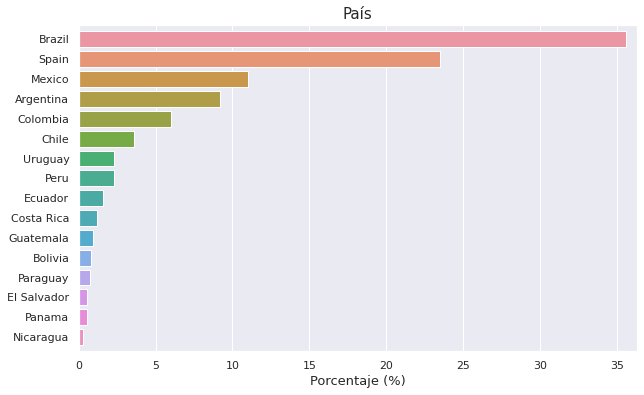

In [69]:
barploth_normalized(data=df.Country, title='País', label=False, figsize=(10,6))

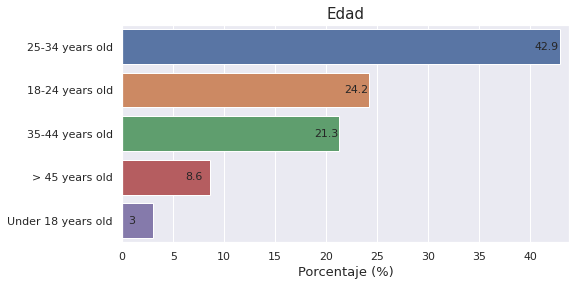

In [70]:
barploth_normalized(df.Age, title='Edad')

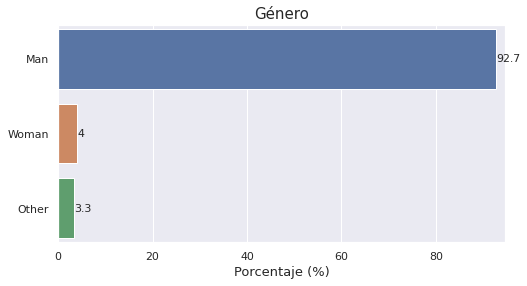

In [71]:
barploth_normalized(df.Gender, title='Género', padding=0)

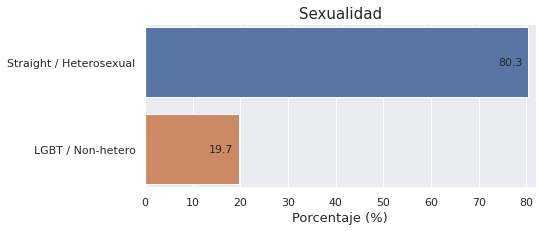

In [76]:
barploth_normalized(df.Sexuality, title='Sexualidad', padding=-30, figsize=(7, 3))

* Las personas encuestadas que se identificaron como hombres son el 92%. Esto muestra una fuerte desigualdad de género.

* De la misma forma, personas que se identifican como no heterosexuales son minoría (19.7%).

### Educación

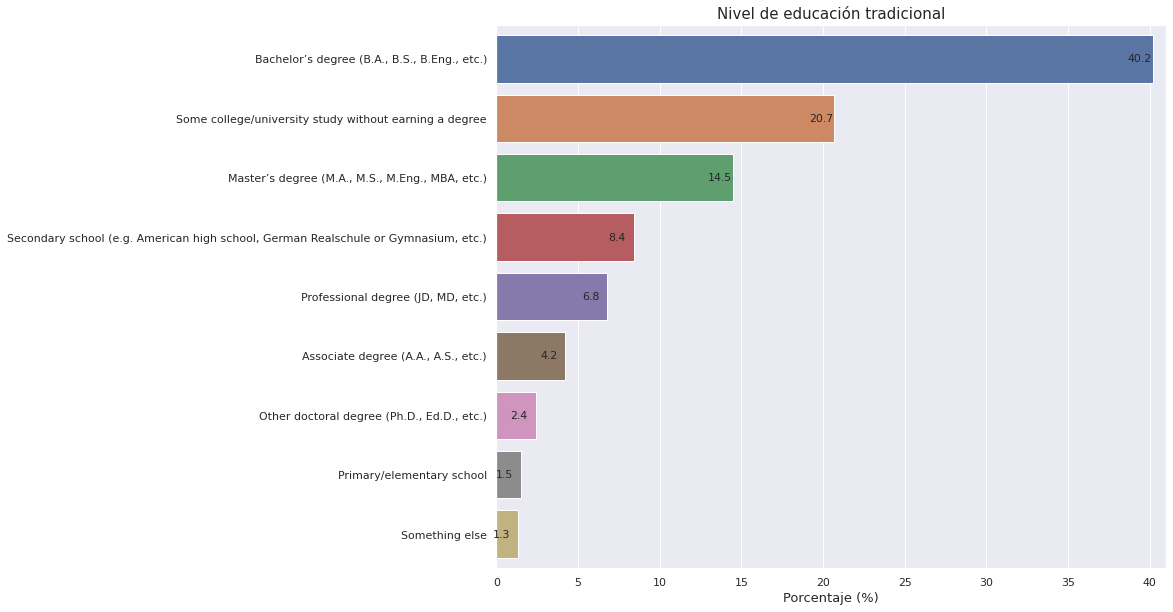

In [79]:
barploth_normalized(df.EdLevel, title='Nivel de educación tradicional', padding=-25, figsize=(12,10))

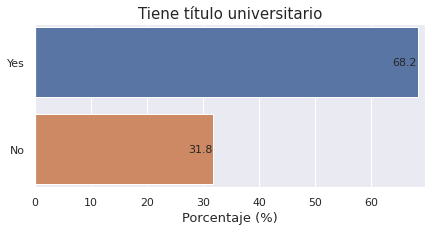

In [81]:
barploth_normalized(df.Degree, title='Tiene título universitario', figsize=(7,3))

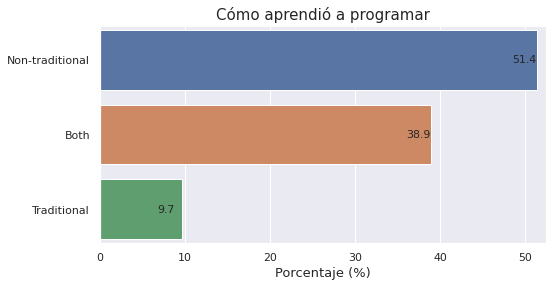

In [82]:
barploth_normalized(df.LearnCode, title='Cómo aprendió a programar')

In [45]:
px.histogram(df, x='YearsLearnPro', marginal='box', title='Años desde que empezó a aprender código hasta ser profesional', nbins=50)

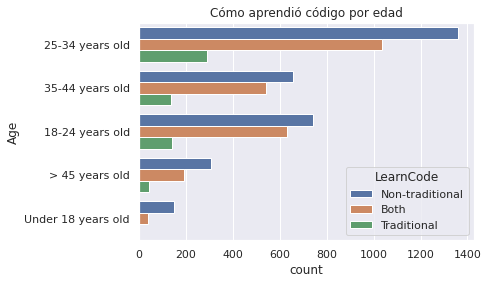

In [46]:
sns.countplot(y=df.Age, hue=df.LearnCode, hue_order=['Non-traditional', 'Both', 'Traditional'])
plt.title('Cómo aprendió código por edad')
plt.show()

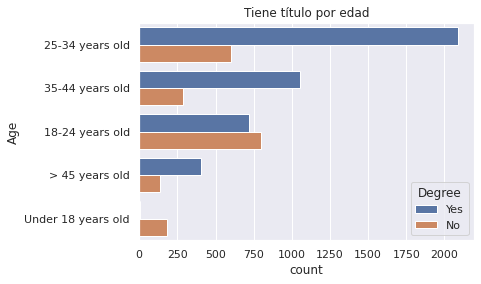

In [47]:
sns.countplot(y=df.Age, hue=df.Degree)
plt.title('Tiene título por edad')
plt.show()

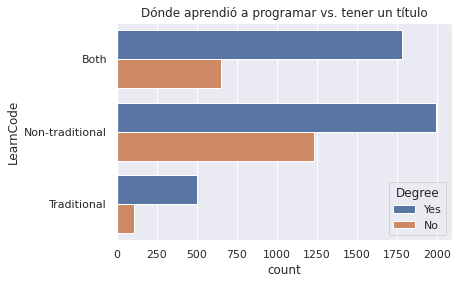

In [48]:
sns.countplot(y=df.LearnCode, hue=df.Degree)
plt.title('Dónde aprendió a programar vs. tener un título')
plt.show()

* La mayoría tiene estudios superiores. Pero pocas personas dicen haber aprendido código en la universidad. Esto sugiere que la mayoría aprendió de forma autodidacta o no tradicional.

* La mayoría de los encuestados tardó entre 2 y 6 años en conseguir su primer empleo desde que empezó a aprender a programar.

* Para todos los rangos de edad la forma de aprender a programar se comporta igual, la mayoría aprendieron a programar de maneras no tradicionales sin importar si tienen estudios superiores o no.

### Empleo

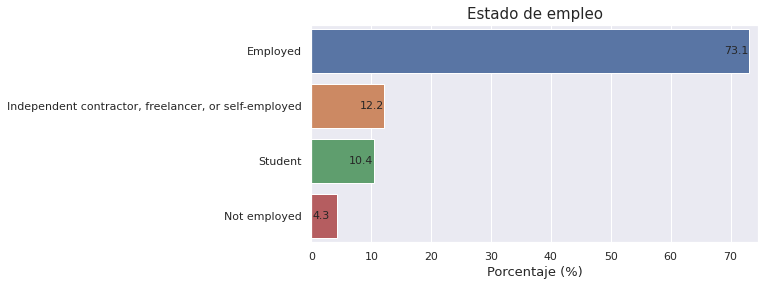

In [84]:
barploth_normalized(df.Employment, title='Estado de empleo')

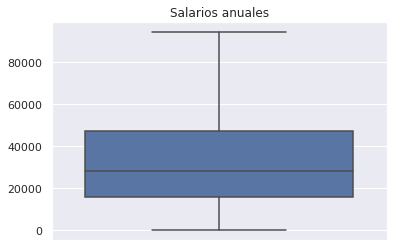

In [89]:
sns.boxplot(y=df.ConvertedCompYearly, showfliers=False)
plt.title('Salarios anuales')
plt.ylabel(None)
plt.show()

- El 85% de los encuestados tienen empleo.
- Sus ganancias rondan entre 15.6k y 47.2k dólares anuales. Y hay varios outliers con ganancias mucho mayores.

# Multivariate EDA

### Género y compensación

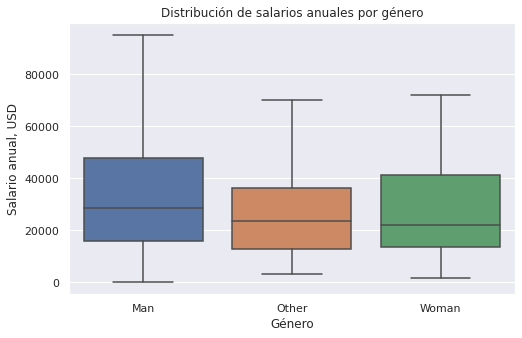

In [99]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Gender", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales por género')
plt.xlabel('Género')
plt.ylabel('Salario anual, USD')
plt.show()

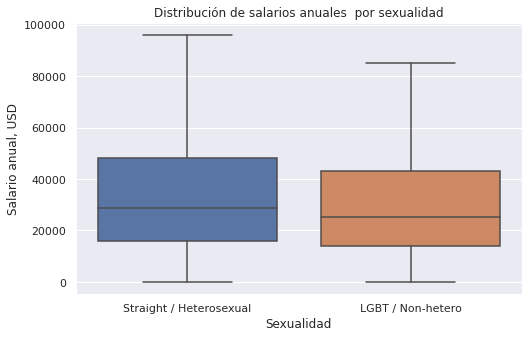

In [100]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Sexuality", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales  por sexualidad')
plt.xlabel('Sexualidad')
plt.ylabel('Salario anual, USD')
plt.show()

- Los hombres ganan más que las mujeres.
- Quienes afirman ser heterosexuales ganan más que los que no.

En el siguiente notebook se harán test de hipótesis para comprobarlo.

### Edades y salarios

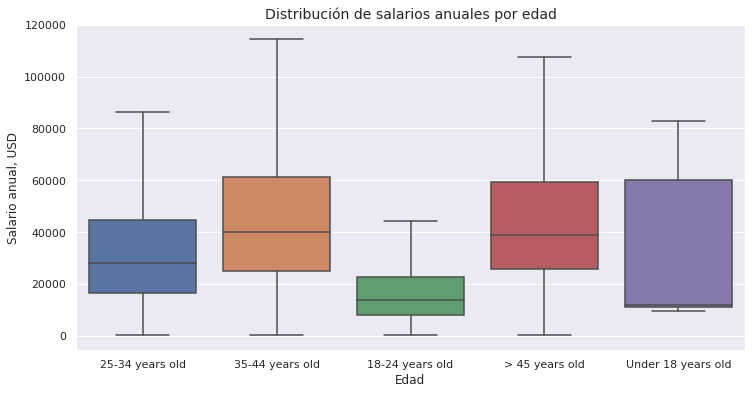

In [102]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="Age", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales por edad', size=14)
plt.xlabel('Edad')
plt.ylabel('Salario anual, USD')
plt.show()

- A partir de los 35 años se tiende a ganar más.
- Los datos de personas de menos de 18 años se deben descartar porque la muestra es muy pequeña.

### Educación y salario

In [54]:
df.groupby(['Age', 'LearnCode'])['ConvertedCompYearly'].median().round(2)

Age                 LearnCode      
18-24 years old     Both               14796.0
                    Non-traditional    13620.0
                    Traditional        13740.0
25-34 years old     Both               28248.0
                    Non-traditional    27492.0
                    Traditional        31884.0
35-44 years old     Both               39998.0
                    Non-traditional    39037.0
                    Traditional        42000.0
> 45 years old      Both               38849.5
                    Non-traditional    41232.0
                    Traditional        36000.0
Under 18 years old  Both               11760.0
                    Non-traditional    35496.0
                    Traditional            NaN
Name: ConvertedCompYearly, dtype: float64

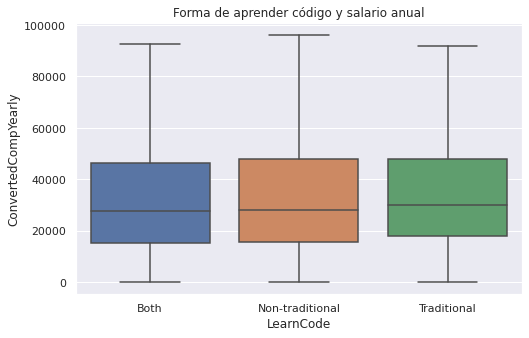

In [103]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df.LearnCode, y=df.ConvertedCompYearly, showfliers=False)
plt.title('Forma de aprender código y salario anual')
plt.show()

No es claro si una categoría gana más que otra. Se realizarán pruebas de hipótesis para comprobar.

Para analizar el nivel de educación y salario se el revisará si hay suficiente cantidad de registros por cada categoría.

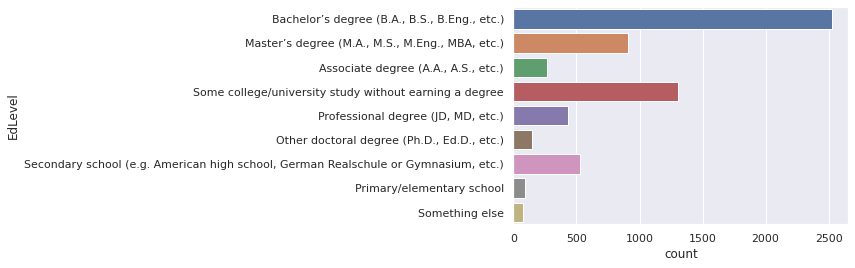

In [56]:
sns.countplot(y=df.EdLevel)
plt.show()

En `Primary/elementary school` y `Something else` la cuenta es muy baja, por lo que se los descartará para el análisis.

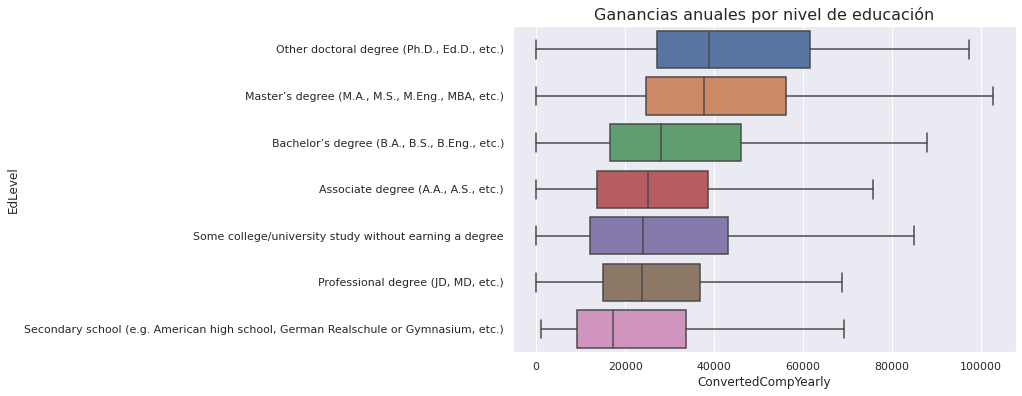

In [108]:
# New DataFrame
edu = pd.DataFrame(df[['EdLevel', 'ConvertedCompYearly']])
edu.drop(edu.EdLevel[edu.EdLevel.isin(['Primary/elementary school', 'Something else'])].index, inplace=True)

# List to order data
median_salary = edu.groupby('EdLevel')[['ConvertedCompYearly']].agg(np.median) \
.sort_values(by='ConvertedCompYearly', ascending=False)

# Plot
plt.figure(figsize=(9,6))
sns.boxplot(y=edu.EdLevel, 
            x=edu.ConvertedCompYearly, 
            order=list(median_salary.index), 
            showfliers=False)
plt.title('Ganancias anuales por nivel de educación', size=16)
plt.show()

#### Tienen empleo o no según tipo de educación

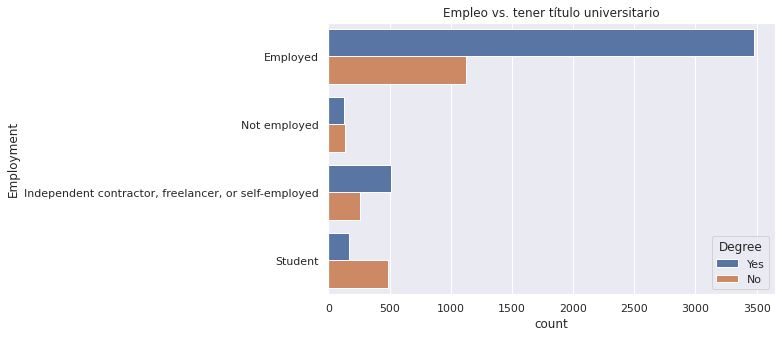

In [109]:
plt.figure(figsize=(8,5))
sns.countplot(y=df.Employment, hue=df.Degree)
plt.title('Empleo vs. tener título universitario')
plt.show()

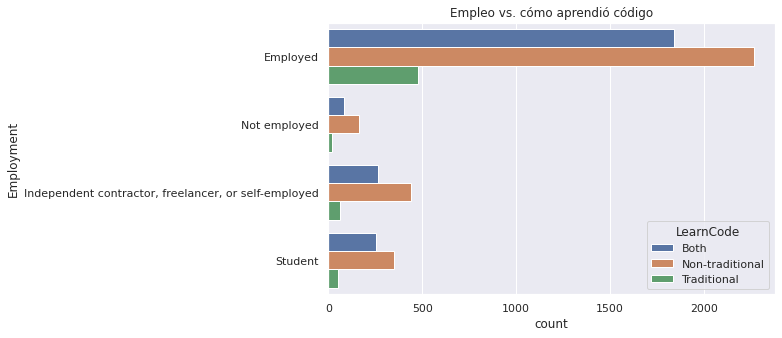

In [110]:
plt.figure(figsize=(8,5))
sns.countplot(y=df.Employment, hue=df.LearnCode)
plt.title('Empleo vs. cómo aprendió código')
plt.show()

- Para los grupos con empleo, domina el tener título y aprender código de manera no tradicional.
- Para los grupos sin empleo y estudiantes, es más común no tener título. También su principal forma de aprender es de manera no tradicional.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09491c61-3767-4289-98fd-88aee19bb45d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>